¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div> 

<div class="alert alert-block alert-info"> Puedes responderme utilizando esto: Hola Tonatiuh, primero que nada agradezco mucho las correcciones que has hecho a mi proyecto y también gracias por sugerencias que me ayudaran a mejorar en futuros proyectos. Debo decir que me ha resultado complicado entender la parte de las pruebas estadísticas pero he buscado apoyo con los asesores y tutores de mi curso, aún es mucha información que no he podido asimilar del todo pero con el tiempo que he dedicado a este curso poco me he ido familiarizando con los conceptos y el código de python. Ahora que veo los comentarios que me has hecho, pienso que pude haber hecho las correcciones de las tablas principales antes para poder hacer los demás ejercicios, ahora me es difícil por la falta de tiempo libre. Si hay algo más que deba mejorar dejame saber. Muchas gracias.
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muchas gracias por el esfuerzo en realizar los ajustes! Como mencionas a lo largo del curso vas a poder seguir aprendiendo diversas herramientas que te van ayudar en los análisis
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

Primero que nada se hará la llamada del método info en cada uno de los dataframe para saber si existen datos vacíos y duplicados. A continuación se revisa si los tipos de datos que contienen cada uno de los dataframes son adecuados para poder trabajar con ellos, si existen tipos de datos no adecuado se procederá a hacer el cambio. También es importante revisar que los nombres de las columnas sean adecuados y hacer en cambio a un nombre más representativo en caso de ser necesario. Otra cosa que también se puede revisar es si podemos agregar información extra a cada uno de los dataframes que pueda ser útil para el análisis.  Una vez hechas las correcciones y limpieza de los datos procede a trabajar con ellos.

Se procede a analizar el costo de las tarifas de los dos planes que se manejan, que en este caso son surf y ultimate. Luego se hacen las agrupaciones para obtener la cantidad de minutos, mensajes y megas usados al mes por cada usuario. Posteriormente se fusiona toda esta información para tener todos los datos obtenidos y se le añade la información del plan y costo para tener los datos en un solo dataframe. Después se procede a realizar los cálculos para saber qué usuarios están teniendo un costo extra por exceder los límites en sus planes.

A continuación se obtienen los promedios de minutos, mensajes y megas para saber el comportamiento de uso que tienen los usuarios en cada uno de los planes. De igual manera se trazan gráficos para los costos extra que tienen los usuarios en cada uno de los planes. Por último, teniendo la información obtenida anteriormente se procede a formular las hipótesis nula y alterna, se hacen los cálculos necesarios para comprobar cual deberá ser aceptada. 

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
from math import factorial
from scipy import stats as st
import math
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

## Cargar datos

In [2]:
# Carga los archivos de datos de los diferentes DataFrames
df_megaline_calls=pd.read_csv('/datasets/megaline_calls.csv')
df_megaline_internet=pd.read_csv('/datasets/megaline_internet.csv')
df_megaline_messages=pd.read_csv('/datasets/megaline_messages.csv')
df_megaline_plans=pd.read_csv('/datasets/megaline_plans.csv')
df_megaline_user=pd.read_csv('/datasets/megaline_users.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
# Se observa que esta tabla solo cuenta con dos columnas, por lo cual se puede imprimir el dataframe completo
print(df_megaline_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Corregir datos

In [5]:
# Se convirtieron las columna usd_monthly_pay y usd_per_gb a float ya que almacena un precio, este tipo de dato es más adecuado 
# Se puede observar que la columna usd_per_gb, hace referencia a que los cobros por exceder los megas de algunos de los planes.
# El cobro se hace por gb, por lo cual para futuros cálculos será necesario convertir los megas a gigas.
df_megaline_plans['usd_monthly_pay']=df_megaline_plans['usd_monthly_pay'].astype('float')
df_megaline_plans['usd_per_gb']=df_megaline_plans['usd_per_gb'].astype('float')
print(df_megaline_plans.dtypes)

messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay          float64
usd_per_gb               float64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object


## Enriquecer los datos

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_megaline_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
print(df_megaline_user.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


En el dataframe user se puede observar que existen 466 valores ausentes en la columna churn_date, como no se sabe la fecha en que el usuario dejó de usar el servicio y se sabe que los datos son del 2018 se llenará la información ausente con el último día del 2018, se cambian también a formato de fecha las columnas reg_date y churn_date.

### Corregir los datos

In [8]:
# Se revisan valores duplicados y ausentes, se hace el cambio de las columnas reg_date y churn_date a tipo fecha.
# En la columna churn_date se llenan los datos vacíos con 2018-12-31, esto porque no se conoce dicha información.
# Tener completa esta columna servirá para los siguientes cálculos. 
# También se hace el cambio de nombre de la columna plan a plan_name
print('Duplicados totales: ', df_megaline_user.duplicated().sum(),'\n')
print('Valores ausentes totales: \n', df_megaline_user.isna().sum(), '\n')
df_megaline_user['churn_date'] = df_megaline_user['churn_date'].fillna('2018-12-31')
print('Valores ausentes totales: \n', df_megaline_user.isna().sum(), '\n')
df_megaline_user['reg_date'] = pd.to_datetime(df_megaline_user['reg_date'], format='%Y-%m-%d')
df_megaline_user['churn_date'] = pd.to_datetime(df_megaline_user['churn_date'], format='%Y-%m-%d')
columns_new = {'plan':'plan_name'}
df_megaline_user = df_megaline_user.rename(columns = columns_new)
print(df_megaline_user.dtypes)

Duplicados totales:  0 

Valores ausentes totales: 
 user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64 

Valores ausentes totales: 
 user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64 

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan_name             object
churn_date    datetime64[ns]
dtype: object


### Enriquecer los datos

In [9]:
# En el dataframe de usuarios se está agregando la información del usd_monthly_pay que será útil para hacer cálculos.
# Se borran las columnas sobrantes que no seran útiles. 
df_megaline_user_plan = df_megaline_user.merge(df_megaline_plans, on='plan_name', how='left')
df_megaline_user_plan.drop(['messages_included', 'mb_per_month_included', 'minutes_included', 
                           'usd_per_gb', 'usd_per_message', 'usd_per_minute'],
                           axis=1, inplace=True)
print(df_megaline_user_plan)

     user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city   reg_date plan_name  \
0        Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24  ultimate   
1              Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   
2         Las Vegas-Henderson-Paradise, NV MSA 2018-10-21      surf   
3                                Tulsa, OK MSA 2018-01-28      surf   
4              Seattle-Tacoma-Bellevue, WA MSA 2018-05-23      surf   
..                                         ..

## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprime una muestra de datos para las llamadas
print(df_megaline_calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


Se observa que el nombre de la columna id no es adecuado por lo cual se cambia a call_id ya que es más descriptivo, en la columna call_id se observa que los datos tiene un guión bajo el cual se reemplaza con un espacio vacío. Después esta columna se convierte a int que es un tipo de dato más adecuado para call_id. También se cambia de tipo de dato en la columna call_date por tipo fecha.

### Corregir los datos

In [12]:
# Se cambió el nombre de la columna id por call_id ya que es más descriptivo, se revisa si hay valores duplicados y ausentes. 
# En la columna call_id se observa que los datos tiene un guión bajo el cual se reemplaza con un espacio vacío.
# Después esta columna se convierte a int que es un tipo de dato más adecuado para call_id.
# Se hizo también el cambio de tipo de dato en la columna call_date por tipo fecha.
columns_new = {'id':'call_id'}
df_megaline_calls = df_megaline_calls.rename(columns = columns_new)
print(df_megaline_calls.columns, '\n')
print('Duplicados totales: ', df_megaline_calls.duplicated().sum(),'\n')
print('Valores ausentes totales: \n', df_megaline_calls.isna().sum(), '\n')
df_megaline_calls['call_id']=df_megaline_calls['call_id'].replace('_', '')
df_megaline_calls['call_id']=df_megaline_calls['call_id'].astype('int')
print(df_megaline_calls.head(), '\n')
df_megaline_calls['call_date'] = pd.to_datetime(df_megaline_calls['call_date'], format='%Y-%m-%d')
print(df_megaline_calls.dtypes)

Index(['call_id', 'user_id', 'call_date', 'duration'], dtype='object') 

Duplicados totales:  0 

Valores ausentes totales: 
 call_id      0
user_id      0
call_date    0
duration     0
dtype: int64 

   call_id  user_id   call_date  duration
0   100093     1000  2018-12-27      8.52
1  1000145     1000  2018-12-27     13.66
2  1000247     1000  2018-12-27     14.48
3  1000309     1000  2018-12-28      5.76
4  1000380     1000  2018-12-30      4.22 

call_id               int64
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object


### Enriquecer los datos

In [13]:
# Como se menciona en la descripción del proyecto se  Megaline redondea los segundos a minutos 
# En cada llamada individual, por ello se crea una nueva columna llamada duration_round con la información redondeada.
# Se usa apply(np.ceil) para hacer el redondeo hacia arriba, aunque la llamada haya durado menos de un minuto se hace el cobro.
df_megaline_calls['duration_round'] = df_megaline_calls['duration'].apply(np.ceil)
print(df_megaline_calls)

        call_id  user_id  call_date  duration  duration_round
0        100093     1000 2018-12-27      8.52             9.0
1       1000145     1000 2018-12-27     13.66            14.0
2       1000247     1000 2018-12-27     14.48            15.0
3       1000309     1000 2018-12-28      5.76             6.0
4       1000380     1000 2018-12-30      4.22             5.0
...         ...      ...        ...       ...             ...
137730  1499199     1499 2018-11-21      8.72             9.0
137731  1499200     1499 2018-10-20     10.89            11.0
137732  1499201     1499 2018-09-21      8.12             9.0
137733  1499202     1499 2018-10-10      0.37             1.0
137734  1499203     1499 2018-12-29     13.86            14.0

[137735 rows x 5 columns]


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

## Mensajes

In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Imprime una muestra de datos para los mensajes
print(df_megaline_messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


En este dataframe se puede observar que el nombre de la columna id no es adecuado por lo cual procede a cambiarlo por message_id que es más descriptivo. La información del dataframe muestra que no hay valores ausentes. En la columna message_id se observa que los datos tiene un guión bajo. También se observan tipos de datos no adecuados que será necesario cambiar. 

### Corregir los datos

In [16]:
# Se cambió el nombre de la columna id por message_id ya que es más descriptivo, se revisa si hay valores duplicados y ausentes. 
# En la columna message_id se observa que los datos tiene un guión bajo el cual se reemplaza con un espacio vacío.
# Después esta columna se convierte a int que es un tipo de dato más adecuado para message_id.
# Se hizo también el cambio de tipo de dato en la columna message_date por tipo fecha.
columns_new = {'id':'message_id'}
df_megaline_messages = df_megaline_messages.rename(columns = columns_new)
print(df_megaline_messages.columns, '\n')
print('Duplicados totales: ', df_megaline_messages.duplicated().sum(),'\n')
print('Valores ausentes totales: \n', df_megaline_messages.isna().sum(), '\n')
df_megaline_messages['message_id']=df_megaline_messages['message_id'].replace('_', '')
df_megaline_messages['message_id']=df_megaline_messages['message_id'].astype('int')
print(df_megaline_messages, '\n')
df_megaline_messages['message_date'] = pd.to_datetime(df_megaline_messages['message_date'], format='%Y-%m-%d')
print(df_megaline_messages.dtypes)

Index(['message_id', 'user_id', 'message_date'], dtype='object') 

Duplicados totales:  0 

Valores ausentes totales: 
 message_id      0
user_id         0
message_date    0
dtype: int64 

       message_id  user_id message_date
0         1000125     1000   2018-12-27
1         1000160     1000   2018-12-31
2         1000223     1000   2018-12-31
3         1000251     1000   2018-12-27
4         1000255     1000   2018-12-26
...           ...      ...          ...
76046     1497526     1497   2018-12-24
76047     1497536     1497   2018-12-24
76048     1497547     1497   2018-12-31
76049     1497558     1497   2018-12-24
76050     1497613     1497   2018-12-23

[76051 rows x 3 columns] 

message_id               int64
user_id                  int64
message_date    datetime64[ns]
dtype: object


### Enriquecer los datos

## Internet

In [17]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
# Imprime una muestra de datos para el tráfico de internet
print(df_megaline_internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


Al igual que los dataframe se puede observar que el nombre de la columna id no es adecuado por lo cual procede a cambiarlo por uno más descriptivo. La información del dataframe muestra que no hay valores ausentes. En la columna id se observa que los datos tienen un guión bajo. También se observan tipos de datos no adecuados que será necesario cambiar. 

### Corregir los datos

In [19]:
# Se cambió el nombre de la columna id por internet_id ya que es más descriptivo, se revisa si hay valores duplicados y ausentes. 
# En la columna internet_id se observa que los datos tiene un guión bajo el cual se reemplaza con un espacio vacíos.
# Después esta columna se convierte a int que es un tipo de dato más adecuado para internet_id.
# Se hizo también el cambio de tipo de dato en la columna session_date por tipo fecha.
# Una vez que se comience con los cálculos será necesario hacer el redondeo hacia arriba de la mb_used y hacer la conversión de mb a gb.
columns_new = {'id':'internet_id'}
df_megaline_internet = df_megaline_internet.rename(columns = columns_new)
print(df_megaline_internet.columns, '\n')
print('Duplicados totales: ', df_megaline_internet.duplicated().sum(),'\n')
print('Valores ausentes totales: \n', df_megaline_internet.isna().sum(), '\n')
df_megaline_internet['internet_id']=df_megaline_internet['internet_id'].replace('_', '')
df_megaline_internet['internet_id']=df_megaline_internet['internet_id'].astype('int')
print(df_megaline_internet, '\n')
df_megaline_internet['session_date'] = pd.to_datetime(df_megaline_internet['session_date'], format='%Y-%m-%d')
print(df_megaline_messages.dtypes)

Index(['internet_id', 'user_id', 'session_date', 'mb_used'], dtype='object') 

Duplicados totales:  0 

Valores ausentes totales: 
 internet_id     0
user_id         0
session_date    0
mb_used         0
dtype: int64 

        internet_id  user_id session_date  mb_used
0            100013     1000   2018-12-29    89.86
1           1000204     1000   2018-12-31     0.00
2           1000379     1000   2018-12-28   660.40
3           1000413     1000   2018-12-26   270.99
4           1000442     1000   2018-12-27   880.22
...             ...      ...          ...      ...
104820      1499215     1499   2018-10-20   218.06
104821      1499216     1499   2018-12-30   304.72
104822      1499217     1499   2018-09-22   292.75
104823      1499218     1499   2018-12-07     0.00
104824      1499219     1499   2018-12-24   758.31

[104825 rows x 4 columns] 

message_id               int64
user_id                  int64
message_date    datetime64[ns]
dtype: object


### Enriquecer los datos

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

## Estudiar las condiciones de las tarifas

In [20]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_megaline_plan_normal=df_megaline_plans.loc[:, 'messages_included':'usd_monthly_pay']
df_megaline_plan_exceed=df_megaline_plans.loc[:,'usd_per_gb':'usd_per_minute']
print('Descripción de la tarifas Surf\n', df_megaline_plan_normal.loc[0], '\n')
print('Precios si se exceden los límites del paquete Surf\n', df_megaline_plan_exceed.loc[0], '\n')
print('Descricion de la tarifa plan ultimate\n', df_megaline_plan_normal.loc[1], '\n')
print('Precios si se exceden los límites del paquete Ultimate\n', df_megaline_plan_exceed.loc[1], '\n')

Descripción de la tarifas Surf
 messages_included           50.0
mb_per_month_included    15360.0
minutes_included           500.0
usd_monthly_pay             20.0
Name: 0, dtype: float64 

Precios si se exceden los límites del paquete Surf
 usd_per_gb         10.00
usd_per_message     0.03
usd_per_minute      0.03
Name: 0, dtype: float64 

Descricion de la tarifa plan ultimate
 messages_included         1000.0
mb_per_month_included    30720.0
minutes_included          3000.0
usd_monthly_pay             70.0
Name: 1, dtype: float64 

Precios si se exceden los límites del paquete Ultimate
 usd_per_gb         7.00
usd_per_message    0.01
usd_per_minute     0.01
Name: 1, dtype: float64 



## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [21]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# Se agrupa la información, por user_id, se extrae el mes de la fecha y se hace el conteo de la llamadas.
df_call_by_user_month=df_megaline_calls.groupby([df_megaline_calls['user_id'], df_megaline_calls['call_date'].dt.month])['user_id'].count()
print('Llamadas hechas por cada usuario al mes:\n', df_call_by_user_month)

Llamadas hechas por cada usuario al mes:
 user_id  call_date
1000     12           16
1001     8            27
         9            49
         10           65
         11           64
                      ..
1498     12           39
1499     9            41
         10           53
         11           45
         12           65
Name: user_id, Length: 2258, dtype: int64


<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>



In [22]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
# Se agrupa la información, por user_id, se extrae el mes de la fecha y se hace la suma de los minutos usados.
df_min_by_user_month=df_megaline_calls.groupby([df_megaline_calls['user_id'], df_megaline_calls['call_date'].dt.month])['duration_round'].sum()
print('Minutos gastados por cada usuario al mes\n', df_min_by_user_month)

Minutos gastados por cada usuario al mes
 user_id  call_date
1000     12           124.0
1001     8            182.0
         9            315.0
         10           393.0
         11           426.0
                      ...  
1498     12           339.0
1499     9            346.0
         10           385.0
         11           308.0
         12           496.0
Name: duration_round, Length: 2258, dtype: float64


In [23]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
# Se agrupa la información, por user_id, se extrae el mes de la fecha y se hace el conteo de los mensajes enviados.
df_message_by_user_month=df_megaline_messages.groupby([df_megaline_messages['user_id'], df_megaline_messages['message_date'].dt.month])['user_id'].count()
print('Mensajes enviados por usuario al mes: \n', df_message_by_user_month)

Mensajes enviados por usuario al mes: 
 user_id  message_date
1000     12              11
1001     8               30
         9               44
         10              53
         11              36
                         ..
1496     9               21
         10              18
         11              13
         12              11
1497     12              50
Name: user_id, Length: 1806, dtype: int64


In [24]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
# Se agrupa la información por user_id, se extrae el mes de la fecha, se hace la suma de los megas usados y se redondean estos datos convirtiéndolos a int.
df_mb_by_user_month=df_megaline_internet.groupby([df_megaline_internet['user_id'], df_megaline_internet['session_date'].dt.month])['mb_used'].sum().round().astype('int')
print('Mensajes enviados por usuario al mes: \n', df_mb_by_user_month)

Mensajes enviados por usuario al mes: 
 user_id  session_date
1000     12               1901
1001     8                6919
         9               13315
         10              22330
         11              18504
                         ...  
1498     12              23138
1499     9               12985
         10              19492
         11              16814
         12              22059
Name: mb_used, Length: 2277, dtype: int64


In [25]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
# Se hace una concatenación de los groupby anteriormente realizados de las llamadas, mensajes, minutos y megas.  
# Se usa reset_index(inplace=True) en la tabla concatenada ya que este método hace que reconozca los meses como una columna.
# Se le cambia el nombre a month para que sea más descriptivo.
df_consume_user=pd.concat([df_call_by_user_month, df_min_by_user_month, df_message_by_user_month, df_mb_by_user_month], axis='columns')
df_consume_user.columns = ['call_user_monthly', 'min_user_monthly', 'message_user_monthly', 'mb_user_monthly']
df_consume_user.reset_index(inplace=True)
columns_new = {'level_1':'month'}
df_consume_user = df_consume_user.rename(columns = columns_new)
print(df_consume_user)

      user_id  month  call_user_monthly  min_user_monthly  \
0        1000     12               16.0             124.0   
1        1001      8               27.0             182.0   
2        1001      9               49.0             315.0   
3        1001     10               65.0             393.0   
4        1001     11               64.0             426.0   
...       ...    ...                ...               ...   
2288     1498     12               39.0             339.0   
2289     1499      9               41.0             346.0   
2290     1499     10               53.0             385.0   
2291     1499     11               45.0             308.0   
2292     1499     12               65.0             496.0   

      message_user_monthly  mb_user_monthly  
0                     11.0           1901.0  
1                     30.0           6919.0  
2                     44.0          13315.0  
3                     53.0          22330.0  
4                     36.0          1

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [26]:
# Se añade la información de la tarifa haciendo un merge con la tabla de usuarios y la tabla concatenada.
# Donde se fusionaron los datos de llamadas, minutos, mensajes e Internet con base en user_id.
df_consume_user_fee = pd.merge(df_consume_user, df_megaline_user_plan, on=['user_id'], how='outer')
df_consume_user_fee.drop(['first_name', 'last_name', 'age', 'city', 'reg_date', 'churn_date'], axis=1, inplace=True)
df_consume_user_fee.reset_index(drop=True, inplace=True)
#Se puede observar que la tabla resultante del merge tiene datos vacíos por lo cual se procede a llenarlos con 0 para poder realizar los cálculos en los próximos ejercicios.
df_consume_user_fee.fillna(0)
print(df_consume_user_fee)

      user_id  month  call_user_monthly  min_user_monthly  \
0        1000   12.0               16.0             124.0   
1        1001    8.0               27.0             182.0   
2        1001    9.0               49.0             315.0   
3        1001   10.0               65.0             393.0   
4        1001   11.0               64.0             426.0   
...       ...    ...                ...               ...   
2298     1307    NaN                NaN               NaN   
2299     1319    NaN                NaN               NaN   
2300     1378    NaN                NaN               NaN   
2301     1463    NaN                NaN               NaN   
2302     1473    NaN                NaN               NaN   

      message_user_monthly  mb_user_monthly plan_name  usd_monthly_pay  
0                     11.0           1901.0  ultimate             70.0  
1                     30.0           6919.0      surf             20.0  
2                     44.0          13315.0     

## Estudia el comportamiento de usuario

In [27]:
# Calcula el ingreso mensual para cada usuario
# Se hace un merge de las tablas df_consume_user_fee(anteriormente obtenida), df_megaline_plans(tabla original con los costos de las tarifas) en la columna plan_name 
df_consume_user_monthly = pd.merge(df_consume_user_fee, df_megaline_plans, on=['plan_name'], how='left')
df_consume_user_monthly.reset_index(drop=True, inplace=True)

# Se crea un data frame con solo la información del plan surf, agregando las columnas necesarias para hacer calculos.
df_plan_surf=df_consume_user_monthly.query("plan_name=='surf'")[['user_id', 'month', 'min_user_monthly', 'minutes_included', 
                                                                 'message_user_monthly', 'mb_user_monthly', 'messages_included',
                                                                 'mb_per_month_included', 'usd_monthly_pay_x', 'usd_per_gb', 
                                                                 'usd_per_message', 'usd_per_minute', 'plan_name', 'call_user_monthly']]
# Se crea un data frame con solo la información del plan ultimate, agregando las columnas necesarias para hacer calculos.
df_plan_ultimate=df_consume_user_monthly.query("plan_name=='ultimate'")[['user_id', 'month', 'min_user_monthly', 'minutes_included', 
                                                                 'message_user_monthly', 'mb_user_monthly', 'messages_included',
                                                                 'mb_per_month_included', 'usd_monthly_pay_x', 'usd_per_gb', 
                                                                 'usd_per_message', 'usd_per_minute', 'plan_name', 'call_user_monthly']]
# Cálculo minutos surf, se restan los minutos incluidos de los minutos que el usuario uso en el mes.
# Como algunos lo excedieron la resta da resultados negativos, por que se usa abs() para pasarlos a positivo.
# Se crea un nuevo dataframe para guardar la consulta donde se revisa si los minutos al mes gastados por el usuario son mayores a los que incluye el plan.
# Entonces se hace la multiplicación del exceso de los minutos por el costo de un minuto que excedió el plan. 
# El costo extra obtenido se guarda en una nueva columna. 
df_plan_surf['surf_montly_min']=df_plan_surf['minutes_included']-df_plan_surf['min_user_monthly']
df_plan_surf['surf_montly_min']=df_plan_surf['surf_montly_min'].abs()
df_plan_surf_min=df_plan_surf.query("surf_montly_min > minutes_included")[['user_id', 'month', 
                                                                          'surf_montly_min',
                                                                          'minutes_included',
                                                                          'usd_per_minute',
                                                                          'plan_name']]
df_plan_surf_min['extra_surf_montly_min']=df_plan_surf_min['surf_montly_min']*df_plan_surf_min['usd_per_minute']
# Cálculo mensajes surf, se restan los minutos incluidos de los minutos que el usuario uso en el mes.
# Como algunos lo excedieron la resta da resultados negativos, por que se usa abs() para pasarlos a positivo.
# Se crea un nuevo dataframe para guardar la consulta donde se revisa si los mensajes al mes gastados por el usuario son mayores a los que incluye el plan.
# Entonces se hace la multiplicación del exceso de los mensajes por el costo de un minuto que excedió el plan. 
# El costo extra obtenido se guarda en una nueva columna.
df_plan_surf['surf_montly_men']=df_plan_surf['messages_included']-df_plan_surf['message_user_monthly']
df_plan_surf['surf_montly_men']=df_plan_surf['surf_montly_men'].abs()
df_plan_surf_men=df_plan_surf.query("surf_montly_men > messages_included")[['user_id', 'month', 
                                                                           'surf_montly_men', 
                                                                           'messages_included', 
                                                                           'usd_per_message',
                                                                           'plan_name']]
df_plan_surf_men['extra_surf_montly_men']=df_plan_surf_men['surf_montly_men']*df_plan_surf_men['usd_per_message']
# Calculo mb surf, se restan los mb incluidos de los mb que el usuario uso en el mes.
# Como algunos lo excedieron la resta da resultados negativos, por que se usa abs() para pasarlos a positivo.
# Se crea un nuevo dataframe para guardar la consulta donde se revisa si los mb al mes gastados por el usuario son mayores a los que incluye el plan.
# Como el costo extra de megas se maneja como usd_per_gb, primero se convierten los mb a gb 1 GB = 1024 megabytes.
# Entonces se hace la multiplicación del exceso de los mb por el costo de un minuto que excedió el plan. 
# El costo extra obtenido se guarda en una nueva columna. 
# Se hace el redondeo de la columna surf_montly_mb hacia arriba con apply(np.ceil)
df_plan_surf['surf_montly_mb']=df_plan_surf['mb_per_month_included']-df_plan_surf['mb_user_monthly']
df_plan_surf['surf_montly_mb']=df_plan_surf['surf_montly_mb'].abs()
df_plan_surf_mb=df_plan_surf.query("surf_montly_mb > mb_per_month_included")[['user_id', 'month', 
                                                                             'surf_montly_mb',
                                                                             'mb_per_month_included', 
                                                                             'usd_per_gb',
                                                                             'plan_name']]
df_plan_surf_mb['surf_montly_mb']=df_plan_surf_mb['surf_montly_mb']/1024
df_plan_surf_mb['surf_montly_mb']=df_plan_surf_mb['surf_montly_mb'].apply(np.ceil)
df_plan_surf_mb['extra_surf_montly_mb']=df_plan_surf_mb['surf_montly_mb']*df_plan_surf_mb['usd_per_gb']
# Calculo minutos ultimate, se restan los minutos incluidos de los minutos que el usuario uso en el mes.
# Como algunos lo excedieron la resta da resultados negativos, por que se usa abs() para pasarlos a positivo.
# Se crea un nuevo dataframe para guardar la consulta donde se revisa si los minutos al mes gastados por el usuario son mayores a los que incluye el plan.
# Entonces se hace la multiplicación del exceso de los minutos por el costo de un minuto que excedió el plan. 
# El costo extra obtenido se guarda en una nueva columna. 
df_plan_ultimate['ultimate_montly_min']=df_plan_ultimate['minutes_included']-df_plan_ultimate['min_user_monthly']
df_plan_ultimate['ultimate_montly_min']=df_plan_ultimate['ultimate_montly_min'].abs()
df_plan_ultimate_min=df_plan_ultimate.query("ultimate_montly_min > minutes_included")[['user_id', 'month', 
                                                                                      'ultimate_montly_min',
                                                                                      'usd_per_minute',
                                                                                      'plan_name']]
df_plan_ultimate_min['extra_ultimate_montly_min']=df_plan_ultimate_min['ultimate_montly_min']*df_plan_ultimate_min['usd_per_minute']
# Calculo mensajes ultimate, se restan los minutos incluidos de los minutos que el usuario uso en el mes.
# Como algunos lo excedieron la resta da resultados negativos, por que se usa abs() para pasarlos a positivo.
# Se crea un nuevo dataframe para guardar la consulta donde se revisa si los mensajes al mes gastados por el usuario son mayores a los que incluye el plan.
# Entonces se hace la multiplicación del exceso de los mensajes por el costo de un minuto que excedió el plan. 
# El costo extra obtenido se guarda en una nueva columna.
df_plan_ultimate['ultimate_montly_men']=df_plan_ultimate['messages_included']-df_plan_ultimate['message_user_monthly']
df_plan_ultimate_men=df_plan_ultimate.query("ultimate_montly_men > messages_included")[['user_id', 'month', 
                                                                                       'ultimate_montly_men', 
                                                                                       'messages_included', 
                                                                                       'usd_per_message',
                                                                                       'plan_name']]
df_plan_ultimate_men['extra_ultimate_montly_men']=df_plan_ultimate_men['ultimate_montly_men']*df_plan_ultimate_men['usd_per_message']
# Calculo mb ultimate, se restan los mb incluidos de los mb que el usuario uso en el mes.
# Como algunos lo excedieron la resta da resultados negativos, por que se usa abs() para pasarlos a positivo.
# Se crea un nuevo dataframe para guardar la consulta donde se revisa si los mb al mes gastados por el usuario son mayores a los que incluye el plan.
# Como el costo extra de megas se maneja como usd_per_gb, primero se convierten los mb a gb 1 GB = 1024 megabytes.
# Entonces se hace la multiplicación del exceso de los mb por el costo de un minuto que excedió el plan. 
# El costo extra obtenido se guarda en una nueva columna.
# Se hace el redondeo de la columna ultimate_montly_mb hacia arriba con apply(np.ceil)
df_plan_ultimate['ultimate_montly_mb']=df_plan_ultimate['mb_per_month_included']-df_plan_ultimate['mb_user_monthly']
df_plan_ultimate['ultimate_montly_mb']=df_plan_ultimate['ultimate_montly_mb'].abs()
df_plan_ultimate_mb=df_plan_ultimate.query("ultimate_montly_mb > mb_per_month_included")[['user_id', 'month', 
                                                                                         'ultimate_montly_mb', 
                                                                                         'mb_per_month_included', 
                                                                                         'usd_per_gb',
                                                                                         'plan_name']]
df_plan_ultimate_mb['ultimate_montly_mb']=df_plan_ultimate['ultimate_montly_mb']/1024
df_plan_ultimate_mb['ultimate_montly_mb']=df_plan_ultimate_mb['ultimate_montly_mb'].apply(np.ceil)
df_plan_ultimate_mb['extra_ultimate_montly_mb']=df_plan_ultimate_mb['ultimate_montly_mb']*df_plan_ultimate_mb['usd_per_gb']

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que para este punto, es necesario  redondear la transformación de megabytes a gigabytes. Esto cobra importancia dado que estamos calculando por cuanto se paso cada usuario, entonces el no redondear puede alterar este valor.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

In [28]:
# En esta parte se está haciendo el cálculo de total de la tarifa de los usuario de cada plan, para ello se agrupan por user_ id y month.
# A esto se le aplica el método sum() dos veces para obtener el total. 
surf_usd_monthly_pay_total=df_plan_surf.groupby(['user_id', 'month'])['usd_monthly_pay_x'].sum().sum()
print("Tarifa total en USD usuarios Surf: ", surf_usd_monthly_pay_total)
ultimate_usd_monthly_pay_total=df_plan_ultimate.groupby(['user_id', 'month'])['usd_monthly_pay_x'].sum().sum()
print("Tarifa total en USD usuarios Ultimate: ", ultimate_usd_monthly_pay_total)


Tarifa total en USD usuarios Surf:  31460.0
Tarifa total en USD usuarios Ultimate:  50400.0


In [29]:
# De los cálculos realizados anteriormente para obtener los gastos extra que hicieron los usuarios de cada plan. 
# Esta parte se están concatenando estos resultados, gastos extra por minutos, mensajes y megas. 
# Se está haciendo una concatenación de las tablas donde se obtuvieron los resultados de los gastos extra y se borran las columnas sobrantes. 
# Una vez obtenido el total extra se suma al total de la tarifa de cada plan y se obtiene el total de la tarifa de cada plan. 
# Cabe resaltar que de acuerdo a los cálculos realizados se encontró que en el plan ultimate los usuarios no excedieron los límites el plan por ello para el cálculo de esta tarifa no hay un gasto extra que sumar. 
df_consume_extra_fee = pd.concat([df_plan_surf_min, df_plan_surf_men, df_plan_surf_mb, 
                                df_plan_ultimate_min, df_plan_ultimate_men, df_plan_ultimate_mb], axis=0)
df_consume_extra_fee.drop(['surf_montly_min', 'minutes_included', 'usd_per_minute', 
                           'surf_montly_men', 'messages_included', 'usd_per_message',
                          'surf_montly_mb', 'mb_per_month_included', 'usd_per_gb',
                          'ultimate_montly_min','ultimate_montly_men', 'ultimate_montly_mb'], axis=1, inplace=True)
df_consume_extra_fee.reset_index(drop=True, inplace=True)

extra_total_surf=(df_consume_extra_fee['extra_surf_montly_min'].sum())+(df_consume_extra_fee['extra_surf_montly_men'].sum())+(df_consume_extra_fee['extra_surf_montly_mb'].sum())
total_surf_pay=(extra_total_surf+surf_usd_monthly_pay_total)
print("Tarifa total en USD usuarios Surf más los gastos extra: ", total_surf_pay)

Tarifa total en USD usuarios Surf más los gastos extra:  46249.770000000004


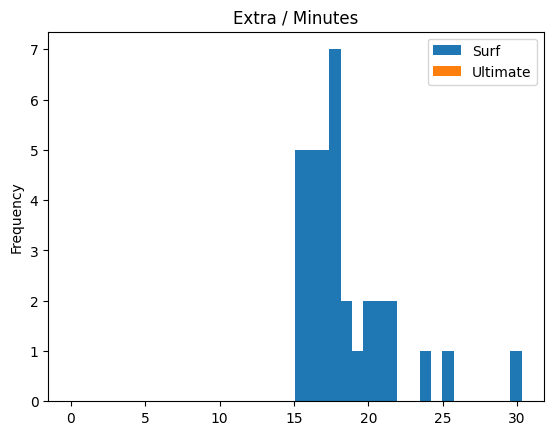

In [30]:
# Se crean histogramas para mostrar el comportamiento de gastos extra en minutos en cada uno de los planes. 
df_plan_surf_min['extra_surf_montly_min'].plot(kind='hist', bins = 20, title = 'Extra / Minutes', ylabel = 'Frequency')
df_plan_ultimate_min['extra_ultimate_montly_min'].plot(kind='hist', bins = 20, title = 'Extra / Minutes', ylabel = 'Frequency')
plt.legend(['Surf', 'Ultimate'])

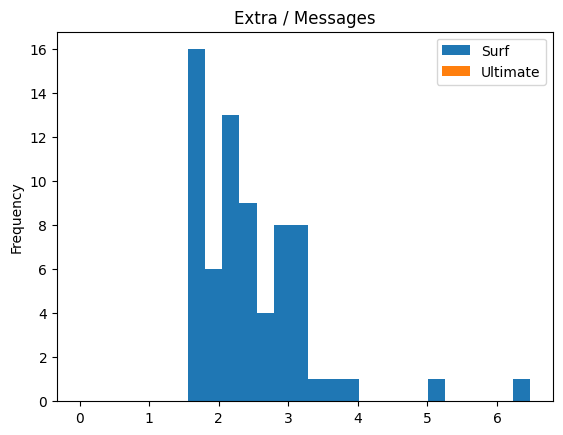

In [31]:
# Se crean histogramas para mostrar el comportamiento de gastos extra en mensajes en cada uno de los planes. 
df_plan_surf_men['extra_surf_montly_men'].plot(kind='hist', bins = 20, title = 'Extra / Messages', ylabel = 'Frequency')
df_plan_ultimate_men['extra_ultimate_montly_men'].plot(kind='hist', bins = 20, title = 'Extra / Messages', ylabel = 'Frequency')
plt.legend(['Surf', 'Ultimate'])

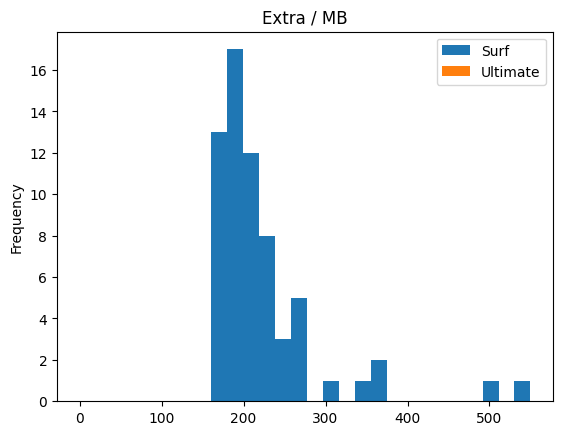

In [32]:
# Se crean histogramas para mostrar el comportamiento de gastos extra en mb en cada uno de los planes. 
df_plan_surf_mb['extra_surf_montly_mb'].plot(kind='hist', bins = 20, title = 'Extra / MB', ylabel = 'Frequency')
df_plan_ultimate_mb['extra_ultimate_montly_mb'].plot(kind='hist', bins = 20, title = 'Extra / MB', ylabel = 'Frequency')
plt.legend(['Surf', 'Ultimate'])

### Llamadas

# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.


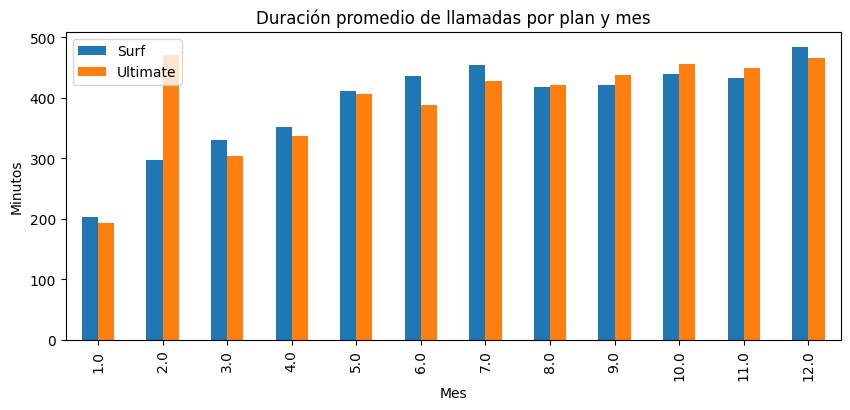

In [33]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Se está usando el metodo pivot_table para agrupar los datos que muestran el la duración promedio de las llamadas al mes por plan de cada usuario. 
# Se agrega una tabla que muestra los resultados.
df_consume_user_monthly.groupby(['month', 'plan_name']).agg({"min_user_monthly":"mean"})
df_consume_user_monthly['month']
consume_user_monthly_min=df_consume_user_monthly.pivot_table(columns='plan_name', 
                                                             index='month', 
                                                             values="min_user_monthly", 
                                                             aggfunc='mean')
consume_user_monthly_min.plot(kind='bar', 
                          title='Duración promedio de llamadas por plan y mes',
                          xlabel='Mes',
                          ylabel='Minutos',
                          figsize=[10,4])
plt.legend(['Surf', 'Ultimate'])
plt.show()

In [34]:
# Calcula la media y la varianza de la duración mensual de llamadas.
print('La mediana es igual a: \n', consume_user_monthly_min.median())
print('La varianza es igual a: \n', np.var(consume_user_monthly_min))

La mediana es igual a: 
 plan_name
surf        419.291020
ultimate    424.252208
dtype: float64
La varianza es igual a: 
 plan_name
surf        5843.400884
ultimate    6085.246960
dtype: float64


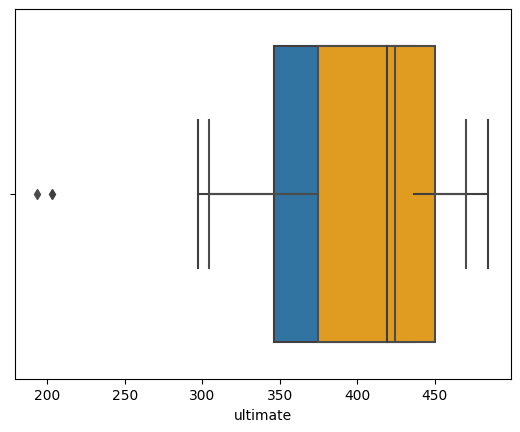

In [35]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
diagrama_caja_surf=sns.boxplot(consume_user_monthly_min['surf'], x='Minutes')
diagrama_caja_ultimate=sns.boxplot(consume_user_monthly_min['ultimate'], x='Minutes', color='orange')
plt.show()

De acuerdo al diagrama de caja mostrado, se puede observar que el valor mínimo en ambos planes queda cerca de los 300 minutos. La mediana para ambos planes es alrededor de 400 minutos y un valor máximo que ronda alrededor de 450 minutos para ambos planes. Con esto podemos llegar a la conclusión de que los usuario del plan surf son quienes están excediendo el límite de su plan, usando un promedio similar de minutos a los usuarios de ultimate.

### Mensajes

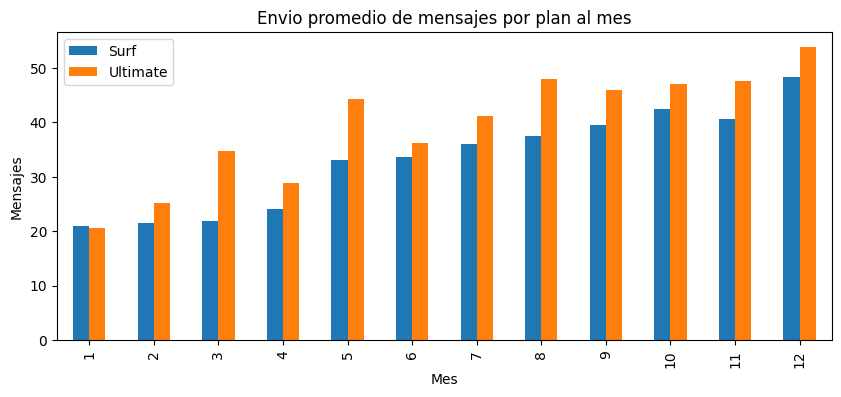

In [36]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Se está usando el metodo pivot_table para agrupar los datos que muestran el promedio de mensajes al mes por plan de cada usuario. 
# Se agrega una tabla que muestra los resultados.
df_consume_user_monthly['month']=df_consume_user_monthly['month'].fillna(0).astype('int')
consume_user_monthly_men=df_consume_user_monthly.pivot_table(columns='plan_name', 
                                                             index='month', 
                                                             values="message_user_monthly", 
                                                             aggfunc='mean')
consume_user_monthly_men.plot(kind='bar', 
                          title='Envio promedio de mensajes por plan al mes',
                          xlabel='Mes',
                          ylabel='Mensajes',
                          figsize=[10,4])
plt.legend(['Surf', 'Ultimate'])
plt.show()

En la gráfica se observa que, tanto los usuarios de plan surf como los usuarios del plan ultimate están enviando la misma cantidad de mensajes. cabe resaltar que el plan ultimate tiene un límite de 1000 mensajes a los usuarios de este plan no se están acercando para nada. en cambio los usuario de plan surf apenas llegan se límite que es 50, con lo cual podemos concluir que solo urante los últimos meses del año los usuarios de surf son los que están más cerca se pasar el límite de mensajes incluidos en su plan. 

### Internet

In [46]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
# Se está usando el metodo pivot_table para agrupar los datos que muestran el promedio de mb al mes por plan de cada usuario. 
# Se agrega una tabla que muestra los resultados.
df_consume_user_monthly['month']=df_consume_user_monthly['month'].astype('int')
consume_user_monthly_mb=df_consume_user_monthly.pivot_table(columns='plan_name', 
                                                            index='month', 
                                                            values="mb_user_monthly", 
                                                            aggfunc='mean')

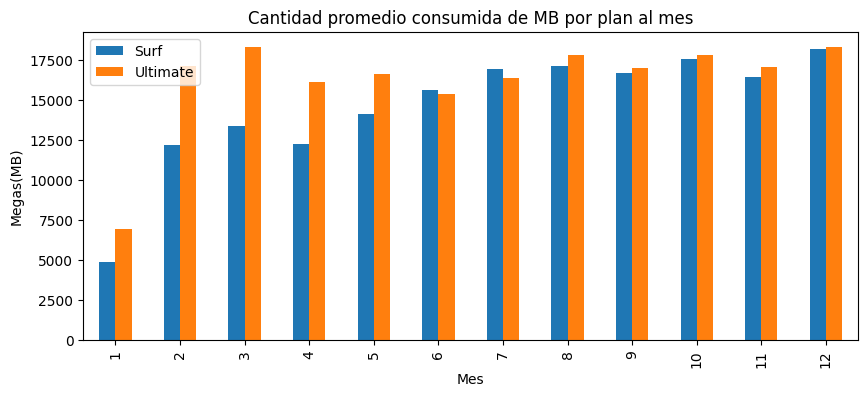

In [38]:
consume_user_monthly_mb.plot(kind='bar', 
                          title='Cantidad promedio consumida de MB por plan al mes',
                          xlabel='Mes',
                          ylabel='Megas(MB)',
                          figsize=[10,4])
plt.legend(['Surf', 'Ultimate'])
plt.show()

En la mayoría de los meses se observa que el comportamiento del uso de los megas de cada usuario, en el plan ultimate es superior. pero cabe resaltar que la cantidad promedio de uso de los megas en el plan surf los usuarios están usando una cantidad similar de megas a los de plan ultimate, por lo que podemos concluir que los usuarios de plan surf están excediendo el límite de megas en el plan surf.

## Ingreso

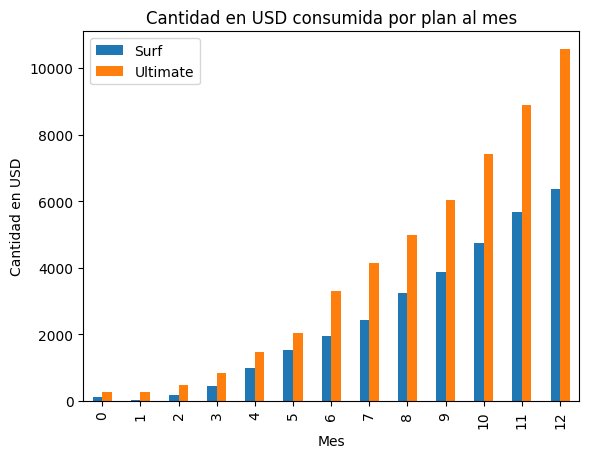

In [39]:
# En esta parte se está creando una pivot_table que filtra los datos por gasto mensual 
# Después se crea una gráfica de barras para comparar el ingreso por mes en cada uno de los planes.
df_consume_user_monthly['month']=df_consume_user_monthly['month'].fillna(0).astype('int')
consume_month=df_consume_user_monthly.pivot_table(columns='plan_name',
                                          index='month', 
                                          values="usd_monthly_pay_x", 
                                          aggfunc='sum')
consume_month.plot(kind='bar', 
                  title='Cantidad en USD consumida por plan al mes',
                  xlabel='Mes',
                  ylabel='Cantidad en USD')
plt.legend(['Surf', 'Ultimate'])
plt.show()

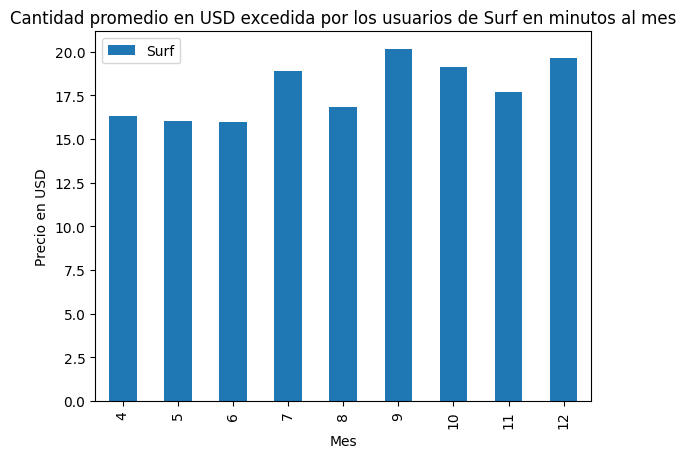

In [40]:
# Se está usando el metodo pivot_table para agrupar los datos que muestran el promedio de gasto extra en minutos al mes por plan de cada usuario. 
# Se agrega una tabla que muestra los resultados.
df_consume_extra_fee['month']=df_consume_extra_fee['month'].fillna(0).astype('int')
surf_fee_min=df_consume_extra_fee.pivot_table(columns='plan_name',
                                          index='month', 
                                          values="extra_surf_montly_min", 
                                          aggfunc='mean')
surf_fee_min.plot(kind='bar', 
                  title='Cantidad promedio en USD excedida por los usuarios de Surf en minutos al mes',
                  xlabel='Mes',
                  ylabel='Precio en USD')
plt.legend(['Surf'])
plt.show()
print()

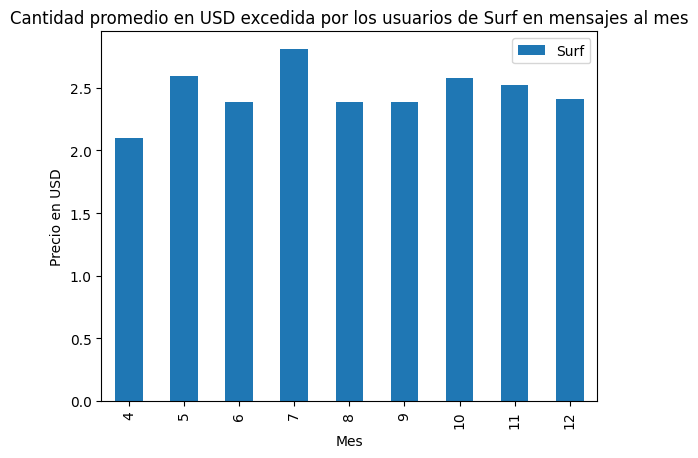

In [41]:
# Se está usando el metodo pivot_table para agrupar los datos que muestran el promedio de gasto extra en mensajes al mes por plan de cada usuario. 
# Se agrega una tabla que muestra los resultados.
df_consume_extra_fee['month']=df_consume_extra_fee['month'].fillna(0).astype('int')
surf_fee_men=df_consume_extra_fee.pivot_table(columns='plan_name',
                                          index='month', 
                                          values="extra_surf_montly_men", 
                                          aggfunc='mean')
surf_fee_men.plot(kind='bar', 
                  title='Cantidad promedio en USD excedida por los usuarios de Surf en mensajes al mes',
                  xlabel='Mes',
                  ylabel='Precio en USD')
plt.legend(['Surf'])
plt.show()

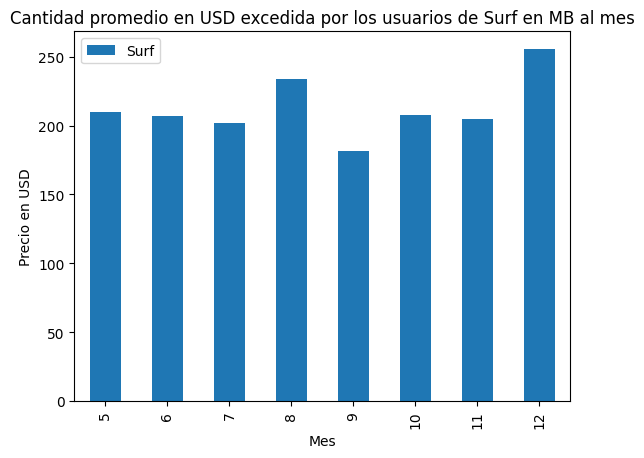

In [42]:
# Se está usando el metodo pivot_table para agrupar los datos que muestran el promedio de gasto extra en mb al mes por plan de cada usuario. 
# Se agrega una tabla que muestra los resultados.
df_consume_extra_fee['month']=df_consume_extra_fee['month'].fillna(0).astype('int')
surf_fee_mb=df_consume_extra_fee.pivot_table(columns='plan_name',
                                          index='month', 
                                          values="extra_surf_montly_mb", 
                                          aggfunc='mean')
surf_fee_mb.plot(kind='bar', 
                  title='Cantidad promedio en USD excedida por los usuarios de Surf en MB al mes',
                  xlabel='Mes',
                  ylabel='Precio en USD')
plt.legend(['Surf'])
plt.show()

De acuerdo a los cálculos realizados y a las gráficas mostradas anteriormente podemos observar que los usuarios del plan surf están excediendo los límites de su paquete para minutos, mensajes y megas.  Se puede observar que en la segunda mitad del año es cuando hay excesos en los límites. Los usuarios del plan ultimate apenas se acercan a los límites que incluye su paquete. Por lo tanto se puede concluir que los usuarios del plan surf son quienes exceden los límites de sus paquetes. 


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones. En este caso las gráficas de box-plots nos ayudan a identificar outiers que pueden sesgar nuestros resultados, especificamente las pruebas de hipótesis. Es por ello que con estás gráficas puedes complementar el análisis eliminando los valores atipicos. 
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

Hipótesis nula: El ingreso promedio de los usuarios de las tarifas Ultimate y Surf no difiere.
Hipótesis alternativa: El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.

In [43]:
# Prueba las hipótesis
# En esta parte se está usando ttest_ind pasando los datos de los ingresos en cada plan para determinar el valor p
# Esto es antes de los ingresos extra de surf, aun así se puede notar que el valor p es superior al 10% por lo tanto se acepta la hipótesis nula 
surf_total=df_consume_user_monthly.groupby(['month', 'plan_name']).agg({"usd_monthly_pay_x":"sum"}).query("plan_name=='surf'")
ultimate_total=df_consume_user_monthly.groupby(['month', 'plan_name']).agg({"usd_monthly_pay_x":"sum"}).query("plan_name=='ultimate'")
p_value=ttest_ind(surf_total, ultimate_total)
print('Valor p: ', p_value.pvalue)

Valor p:  [0.20839074]


In [44]:
# En esta parte se concatenan las tablas que contienen los ingresos extra de surf, se suman para obtener el total de gastos extra de surf.
# Despues se está usando ttest_ind pasando los datos de los ingresos en cada plan para determinar el valor p
# Esto es ya con los ingresos extra de surf, aun así se puede notar que el valor p es superior al 10% por lo tanto se acepta la hipótesis nula 
surf_total_extra=pd.concat([consume_month, surf_fee_min, surf_fee_men, surf_fee_mb], axis=1).fillna(0)
surf_total_extra.columns = ['surf_total', 'ultimate_total', 'surf_extra_min', 'surf_extra_men', 'surf_extra_mb']
surf_total_extra['surf_total_extra']=(surf_total_extra['surf_total']+
                                      surf_total_extra['surf_extra_min']+
                                      surf_total_extra['surf_extra_men']+
                                      surf_total_extra['surf_extra_mb'])
total_surf=surf_total_extra['surf_total_extra']
total_ultimate=surf_total_extra['ultimate_total']
result=ttest_ind(total_surf, total_ultimate)

alpha=0.05 # Se establace así porque son los valores de umbral convencionales son 5% y 1%.
if (result.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
    print('El ingreso promedio de los usuarios de las tarifas Ultimate y Surf si difiere.')
else:
    print("No podemos rechazar la hipótesis nula")
    print("El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere")

No podemos rechazar la hipótesis nula
El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere


[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]
Hipótesis nula:El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey no es diferente al de los usuarios de otras regiones.
Hipótesis alternativa:El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.

In [45]:
# Prueba las hipótesis
# En esta parte se está usando ttest_ind pasando los datos de los ingresos en cada plan para determinar el valor p
df_consume_ny_nj=pd.merge(df_consume_user_monthly, df_megaline_user, on=['user_id'])
df_consume_ny_nj.reset_index(drop=True, inplace=True)
df_consume_ny_nj.drop(['first_name', 'last_name', 'age', 'reg_date', 'churn_date', 'call_user_monthly'], axis=1, inplace=True)
total_ny_nj=df_consume_ny_nj.groupby(['user_id','city']).agg({"usd_monthly_pay_x":"sum"}).query("city=='New York-Newark-Jersey City, NY-NJ-PA MSA'")
total_other_cities=df_consume_ny_nj.groupby(['user_id','city']).agg({"usd_monthly_pay_x":"sum"}).query("city!='New York-Newark-Jersey City, NY-NJ-PA MSA'")
result=ttest_ind(total_ny_nj, total_other_cities)
alpha=0.05 # Se establace así porque son los valores de umbral convencionales son 5% y 1%.
if (result.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
    print('Hipótesis alternativa:El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.')
else:
    print("No podemos rechazar la hipótesis nula")
    print('Hipótesis nula:El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey no es diferente al de los usuarios de otras regiones.')

No podemos rechazar la hipótesis nula
Hipótesis nula:El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey no es diferente al de los usuarios de otras regiones.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]
Como conclusión final para este proyecto se puede decir que las diferencias encontradas en el uso de cada uno de los planes varían, ya que los usuarios del plan surf llegan a exceder los límites de sus paquetes por mucho tanto en minutos llamadas, mensajes y megas. En los cálculos realizados no se encontraron excesos en los usuarios de ultimate, cabe mencionar que los usuarios del plan ultimate apenas llegaron a consumir lo que paquete incluye. Es importante mencionar también que la mayoría de los excesos se dieron durante la segunda mitad del año, incluso en la tarifa normal de cada plan se observó que los usuarios de ambos planes usan sus líneas con mayor frecuencia la segunda mitad del año. Con esto se puede decir que se le puede ofrecer el plan de ultimate a los usuarios de surf que excedieron sus tarifas mostrándoles una comparación de los gastan en excesos de sus paquetes y lo que gastaría si usan el plan ultimate, sería más conveniente para quienes excedan su plan surf cambiarlo a ultimate. 

Como conclusión personal puedo decir que me ha resultado complicado resolver este proyecto, a pesar de ello puedo decir que he aprendido mucho con cada ejercicio que resolver, es complicado algunas veces estar tanto tiempo trabajando en el análisis de datos ya que no dispongo de mucho tiempo libre pero hago lo posible dedicar el mayor tiempo posible. Espero las correcciones para saber en que me hace falta mejorar y gracias quien revise mi proyecto. 